In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def eye(n):
    
    A = np.zeros((n,n))
    np.fill_diagonal(A, 1)
    
    return A

### Linear regression with single variable

In [3]:
data = pd.read_csv('ex1data1.txt', names=["col"])

In [4]:
data['ind']  = data.index

In [5]:
data.reset_index(inplace=True , drop=True)

In [6]:
data=data[['ind', 'col']]

In [7]:
data

,ind,col
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


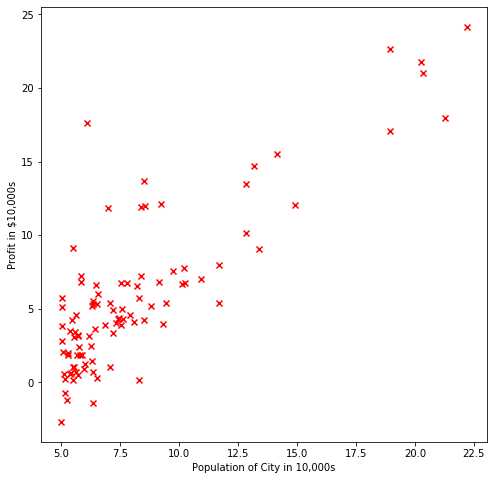

In [8]:
plt.figure(figsize=(8,8))
_=plt.scatter(x=data['ind'], y=data['col'], c='r', marker='x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [9]:
data['ones'] = 1

In [10]:
theta = np.zeros((2,1))

In [11]:
theta

array([[0.],
       [0.]])

In [12]:
iterations = 1500
lr = 0.01

In [13]:
x = data[['ones', 'ind']]
x.head()

,ones,ind
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [14]:
temp=[0 for i in range(len(theta))]

In [15]:
for j in range(iterations):
    for i in range(len(theta)):
        theta_x = np.matmul(np.array(x),theta)
        y = np.array(data['col']).reshape(len(data),1)
        x_j = x.iloc[:,[i]]
        temp[i]=theta[i] - lr*(1/len(data))*np.sum(np.multiply((theta_x-y), x_j))
    for i in range(len(theta)):
        theta[i] = temp[i]
print(theta)
    

[[-3.63029144]
 [ 1.16636235]]


In [16]:
cost = (1/(2*97))*np.sum((theta_x-y)**2)
cost

4.483411453374869

In [17]:
theta_0 = theta[0]
theta_1 = theta[1]
print(theta_0, theta_1)

[-3.63029144] [1.16636235]


In [18]:
def abline(slope, intercept):
    plt.figure(figsize=(8,8))
    _=plt.scatter(x=data['ind'], y=data['col'], c='r', marker='x')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    
    """Plot a line from slope and intercept"""
    x_vals = data['ind']
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.show()

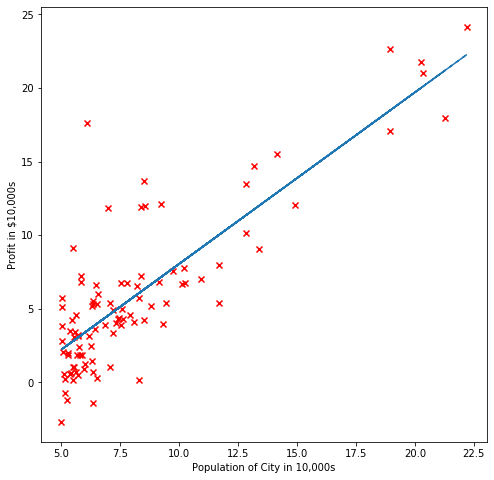

In [19]:
abline(theta_1, theta_0)

### Linear regression with multiple variable , Using Batch Gradient descent

In [20]:
data = pd.read_csv('ex1data2.txt',names=[i+1 for i in range(len(data.columns))])

In [21]:
data.head()

,1,2,3
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [22]:
data[0] = 1
data = data[[0,1,2,3]]
data.head()

,0,1,2,3
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [23]:
mean_1 = data[1].mean()
mean_2 = data[2].mean()
std_1  = data[1].std()
std_2  = data[2].std()

In [24]:
data[1] = (data[1]-data[1].mean())/data[1].std()

In [25]:
data[2] = (data[2]-data[2].mean())/data[2].std()

In [26]:
theta = np.zeros((data.shape[1]-1,1))

In [27]:
lr = 0.01;
iterations = 400;

In [28]:
x = data[[0,1,2]]
x.head()

,0,1,2
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [29]:
temp=[0 for i in range(len(theta))]

In [30]:
iter_num= []
cost = []


In [31]:
for j in range(iterations):
    for i in range(len(theta)):
        theta_x = np.matmul(np.array(x),theta)
        y = np.array(data[3]).reshape(len(data),1)
        x_j = x.iloc[:,[i]]
        temp[i]=theta[i] - lr*(1/len(data))*np.sum(np.multiply((theta_x-y), x_j))
    cost.append((1/(2*len(data)))*np.sum((theta_x-y)**2))
    iter_num.append(j+1)
    for i in range(len(theta)):
        theta[i] = temp[i]
print(theta)

[[334302.06399328]
 [100087.11600585]
 [  3673.54845093]]


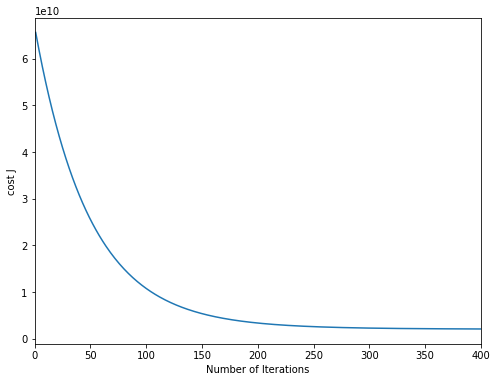

In [32]:
plt.figure(figsize=(8,6))
axes = plt.gca()
_ = plt.plot(iter_num, cost)
axes.set_xlim([0,400])
plt.xlabel("Number of Iterations")
plt.ylabel("cost J")
plt.show()

In [33]:
# Therefore the values of theta obtained from gradient descent

for i in range(len(theta)):
    print(f'The value of theta_{i} as obtained from gradient descent is {theta[i][0]}')

The value of theta_0 as obtained from gradient descent is 334302.06399327697
The value of theta_1 as obtained from gradient descent is 100087.11600584643
The value of theta_2 as obtained from gradient descent is 3673.5484509282555


In [34]:
# predict price of house with given feature
x_1 = 1650
x_2 = 3
x_0 = 1

In [35]:
x_1_norm = (x_1-mean_1)/std_1

In [36]:
x_2_norm = (x_2-mean_2)/std_2

In [37]:
x_1_norm

-0.4412732005944351

In [38]:
x_2_norm

-0.2236751871685913

In [39]:
print(f'The price of given house as predicted by our model is {theta[0][0]*1+theta[1][0]*x_1_norm+theta[2][0]*x_2_norm}')

The price of given house as predicted by our model is 289314.6203377763


### Normal Eqn

In [40]:
data = pd.read_csv('ex1data2.txt',names=[i+1 for i in range(len(data.columns))])

data[0] = 1
data = data[[0,1,2,3]]

x = data[[0,1,2]]

y = np.array(data[3]).reshape(len(data),1)

In [41]:
p1 = np.matmul(np.array(x.T),np.array(x) )

In [42]:
p1 = np.linalg.inv(p1)

In [43]:
theta = np.matmul(p1,np.array(x.T) )

In [44]:
theta = np.matmul(theta, y )

In [45]:
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [46]:
# Therefore the values of theta obtained from Normal Equation

for i in range(len(theta)):
    print(f'The value of theta_{i} as obtained from Normal Equation is {theta[i][0]}')

The value of theta_0 as obtained from Normal Equation is 89597.90954279543
The value of theta_1 as obtained from Normal Equation is 139.21067401762562
The value of theta_2 as obtained from Normal Equation is -8738.01911232782


In [47]:
print(f'The price of given house as predicted by our model is {theta[0][0]*1+theta[1][0]*x_1+theta[2][0]*x_2}')

The price of given house as predicted by our model is 293081.46433489426


### Linear regression with multiple variable , stochastic Gradient descent

In [48]:
data = pd.read_csv('ex1data2.txt',names=[i+1 for i in range(len(data.columns))])

data[0] = 1
data = data[[0,1,2,3]]


mean_1 = data[1].mean()
mean_2 = data[2].mean()
std_1  = data[1].std()
std_2  = data[2].std()

data[1] = (data[1]-data[1].mean())/data[1].std()
data[2] = (data[2]-data[2].mean())/data[2].std()

theta = np.zeros((data.shape[1]-1,1))

lr = 0.01;
iterations = 400;

x = data[[0,1,2]]

temp=[0 for i in range(len(theta))]

iter_num= []
cost = []

y = np.array(data[3]).reshape(len(data),1)


for j in range(iterations):
    for i in range(len(data)):
        for k in range(len(theta)):
            theta_x = np.matmul(np.array(x.iloc[i]),theta)
            x_j = x.iloc[i][k]
            temp[k] = theta[k] - lr*(1/len(data))*(np.multiply((theta_x-y[i]), x_j))
        for k in range(len(theta)):
            theta[k] = temp[k]
print(theta)

[[334168.76818808]
 [ 99999.43810628]
 [  3666.361132  ]]
